In [1]:
from sklearn.datasets import make_regression
from sklearn import linear_model

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Helper methods

In [2]:
def generate_linear_regression_problem(samples_num):
    bias = np.random.uniform(-5, 5)
    data_noise = np.random.uniform(4, 8)
    x_values, y_values = make_regression(n_samples=samples_num, n_features=1, noise=data_noise, 
                                         bias=bias)
    return x_values, y_values.reshape(-1, 1)

### Generate problem

In [3]:
samples_num = 100

In [4]:
x_values, y_values = generate_linear_regression_problem(samples_num)

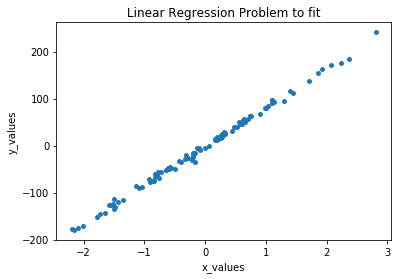

In [5]:
# Presenting generated data
plt.scatter(x_values, y_values, s=15)
plt.title("Linear Regression Problem to fit")
plt.xlabel("x_values")
plt.ylabel("y_values")
plt.show()

### Sklearn solution

In [6]:
# Creating model
linear_regression = linear_model.LinearRegression()

# Training model
linear_regression.fit(x_values, y_values)

/Users/F1sherKK/.pyenv/versions/3.6.1/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# Learned coefficients
print("Coefficients: " + str(linear_regression.intercept_) + str(linear_regression.coef_))

Coefficients: [-1.17108156][[ 82.41715653]]


In [8]:
# Error - Mean Squared Errors
print("Minimized error value: " + str(np.mean((linear_regression.predict(x_values) - y_values) ** 2)))

Minimized error value: 24.6401244855


In [9]:
def hypothesis(x, intercept, coef):
    return intercept[0] + coef[0][0] * x

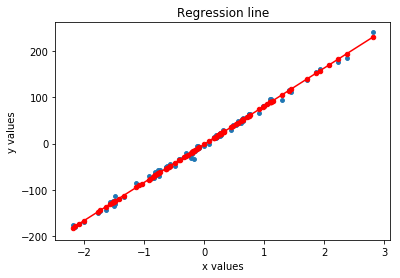

In [10]:
# Displaying dataset
plt.scatter(x_values, y_values, s=15)

# Displaying aproximated function
min_x = np.min(x_values)
max_x = np.max(x_values)
function_x = np.arange(min_x, max_x, 0.01)
function_y = [hypothesis(x, linear_regression.intercept_, linear_regression.coef_) for x in function_x]
plt.plot(function_x, function_y, c="red")

# Displaying predicted values
y_predicted = linear_regression.predict(x_values)
plt.scatter(x_values, y_predicted, s=20, c='red')

plt.title("Regression line")
plt.ylabel("y values")
plt.xlabel("x values")
plt.show()